In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importing both CSV:

In [5]:
consume_data = pd.read_csv("../data/consume_data.csv")

In [6]:
refill_data = pd.read_csv("../data/refill_data.csv")

### Consume data dataframe analysis:

In [7]:
consume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   consume_id    376 non-null    int64  
 1   distance      376 non-null    float64
 2   consume       376 non-null    float64
 3   speed         376 non-null    int64  
 4   temp_inside   376 non-null    float64
 5   temp_outside  376 non-null    int64  
 6   gas_type      376 non-null    object 
 7   AC            376 non-null    int64  
 8   rain          376 non-null    int64  
 9   sun           376 non-null    int64  
 10  snow          376 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 32.4+ KB


In [8]:
consume_data.describe()

,consume_id,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,snow
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000
mean,194.664894,19.797340,4.925266,41.957447,21.929521,11.340426,0.082447,0.122340,0.082447,0.010638
std,112.985094,22.988878,1.040705,13.714354,1.010455,7.066999,0.275411,0.328115,0.275411,0.102729
min,0.000000,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,0.000000
25%,95.500000,11.800000,4.300000,32.000000,21.500000,6.000000,0.000000,0.000000,0.000000,0.000000
50%,194.500000,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,0.000000
75%,293.250000,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,0.000000
max,387.000000,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,1.000000


#### Let's plot some boxplot to see the comparision between gas types:

<AxesSubplot:xlabel='consume', ylabel='Count'>

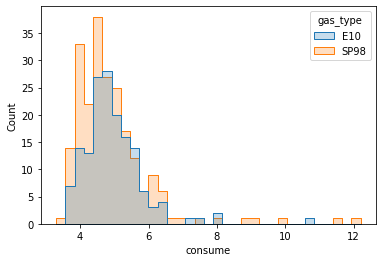

In [49]:
sns.histplot(x=consume_data.consume, hue=consume_data.gas_type, element="step")

<AxesSubplot:xlabel='consume', ylabel='gas_type'>

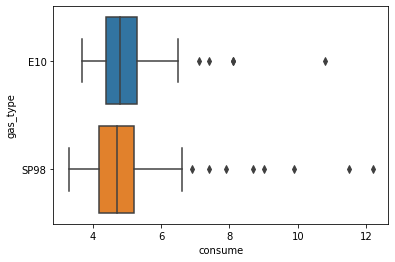

In [9]:
sns.boxplot(data=consume_data, x="consume", y="gas_type")

#### Let's see some numbers:

In [10]:
consume_data.groupby("gas_type").consume.agg(["std", "mean", "median", "min", "max"])

,std,mean,median,min,max
gas_type,,,,,
E10,0.897976,4.950955,4.8,3.7,10.8
SP98,1.133679,4.906849,4.7,3.3,12.2


#### We can see that SP98 gas has a bigger standard deviation consume, we can estimate much better what will be the consume with E10 gas. Also, E10 has a slighly higher consume mean.

#### Is there any difference in the use of the car between gas types?

<AxesSubplot:xlabel='speed', ylabel='gas_type'>

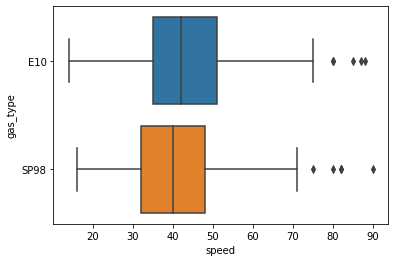

In [11]:
sns.boxplot(data=consume_data, x="speed", y="gas_type")

In [12]:
consume_data.groupby("gas_type").speed.agg(["std", "mean", "median", "min", "max"])

,std,mean,median,min,max
gas_type,,,,,
E10,14.154946,43.566879,42,14,88
SP98,13.302507,40.803653,40,16,90


#### There is slighlty difference in the use of the car with eace gas type.

<AxesSubplot:xlabel='distance', ylabel='gas_type'>

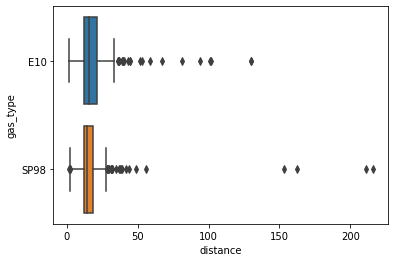

In [13]:
sns.boxplot(data=consume_data, x="distance", y="gas_type")

#### In this plot we have 4 very long trips (over 150 kms) with the SP98.

#### Do we have any correlation between variables?

<AxesSubplot:>

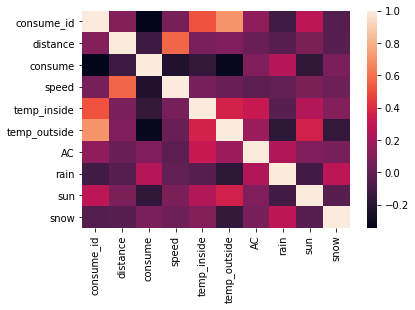

In [14]:
sns.heatmap(consume_data.corr())

#### Distance and speed has a moderate correlation. Let's plot it:

<AxesSubplot:xlabel='distance', ylabel='speed'>

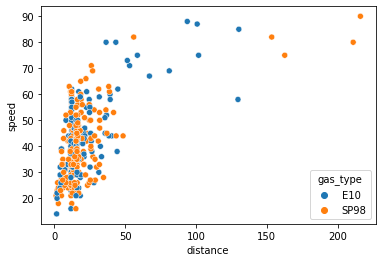

In [15]:
sns.scatterplot(data=consume_data, x="distance", y="speed", hue="gas_type")

#### We have a correlation between distance and speed. It's behaviour looks like an inverse exponential function. It's strange that for mid range trips (50 to 150 km) you use only E10 and for long trips (over 150 km) use SP98.

#### Let's plot the consume against speed:

<AxesSubplot:xlabel='consume', ylabel='speed'>

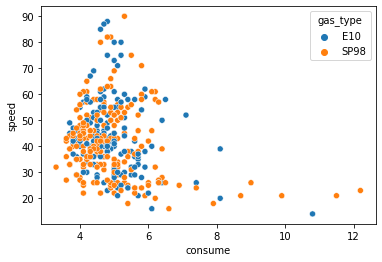

In [16]:
sns.scatterplot(data=consume_data, x="consume", y="speed", hue="gas_type")

#### Let's plot consume against distance:

<AxesSubplot:xlabel='distance', ylabel='consume'>

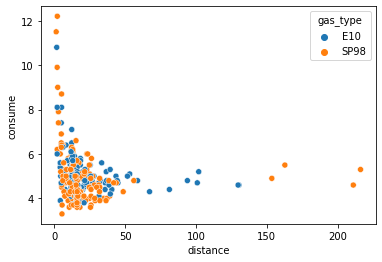

In [106]:
sns.scatterplot(data=consume_data, y="consume", x="distance", hue="gas_type")

#### There's a clear high consume mean in low speeds, specially with SP98. Maybe, depending on the average speed of the car we can choose between gas types. For example, we can have drivers designated to long trip and other to short trips and asignated which type of fuel they should use in order to save money. i will keep digging on this idea.

#### We have few data at high speed and long distances in order to make a good decision about this.

### Let's plot each fuel against different types of days:

In [20]:
E10_df = consume_data[consume_data.gas_type == "E10"]
SP98_df = consume_data[consume_data.gas_type == "SP98"]

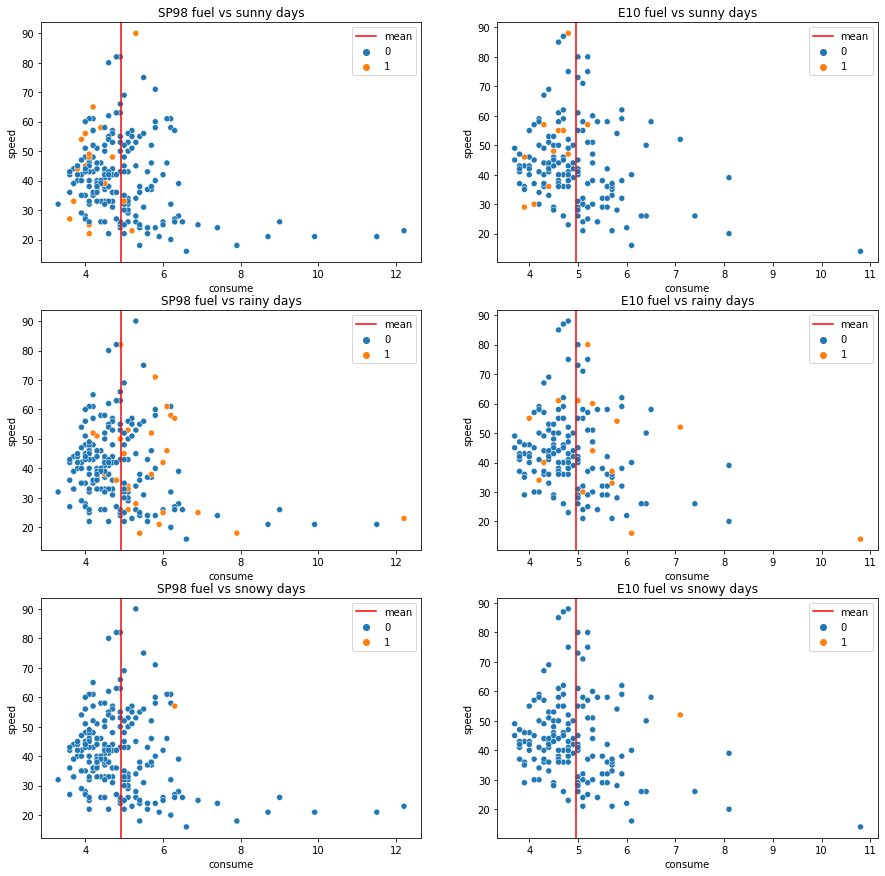

In [99]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

sns.scatterplot(data=SP98_df, x="consume", y="speed", hue="sun", ax=axs[0, 0])
sns.scatterplot(data=E10_df, x="consume", y="speed", hue="sun", ax=axs[0, 1])
sns.scatterplot(data=SP98_df, x="consume", y="speed", hue="rain", ax=axs[1, 0])
sns.scatterplot(data=E10_df, x="consume", y="speed", hue="rain", ax=axs[1, 1])
sns.scatterplot(data=SP98_df, x="consume", y="speed", hue="snow", ax=axs[2, 0])
sns.scatterplot(data=E10_df, x="consume", y="speed", hue="snow", ax=axs[2, 1])

axs[0, 0].set_title("SP98 fuel vs sunny days")
axs[0, 1].set_title("E10 fuel vs sunny days")
axs[1, 0].set_title("SP98 fuel vs rainy days")
axs[1, 1].set_title("E10 fuel vs rainy days")
axs[2, 0].set_title("SP98 fuel vs snowy days")
axs[2, 1].set_title("E10 fuel vs snowy days")

axs[0, 0].axvline(x=SP98_df.consume.mean(), c="red", label="mean")
axs[0, 0].legend()
axs[0, 1].axvline(x=E10_df.consume.mean(), c="red", label="mean")
axs[0, 1].legend()
axs[1, 0].axvline(x=SP98_df.consume.mean(), c="red", label="mean")
axs[1, 0].legend()
axs[1, 1].axvline(x=E10_df.consume.mean(), c="red", label="mean")
axs[1, 1].legend()
axs[2, 0].axvline(x=SP98_df.consume.mean(), c="red", label="mean")
axs[2, 0].legend()
axs[2, 1].axvline(x=E10_df.consume.mean(), c="red", label="mean")
axs[2, 1].legend()

#### In the left side we have SP98 consumes vs sunny, rainy and snowy days. On the right side, the same but with E10 data. 

#### Plotting temperature outside vs different type of days (sunny, rainy and snowy):

<AxesSubplot:xlabel='temp_outside', ylabel='Count'>

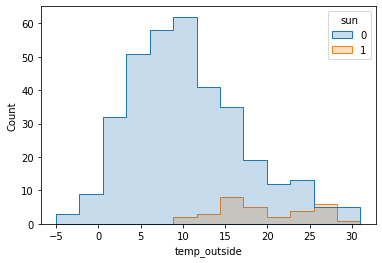

In [73]:
sns.histplot(x=consume_data.temp_outside, hue=consume_data.sun, element="step")

<AxesSubplot:xlabel='temp_outside', ylabel='Count'>

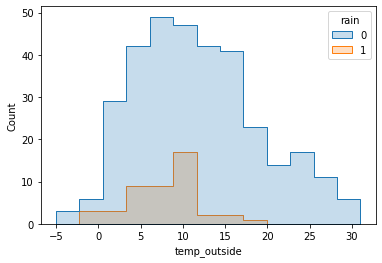

In [79]:
sns.histplot(x=consume_data.temp_outside, hue=consume_data.rain, element="step")

<AxesSubplot:xlabel='temp_outside', ylabel='Count'>

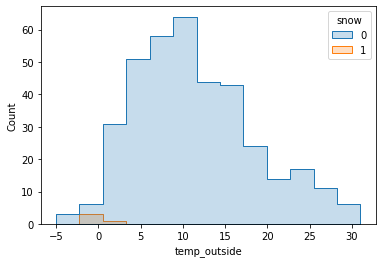

In [80]:
sns.histplot(x=consume_data.temp_outside, hue=consume_data.snow, element="step")

#### Now we can confirm that depends on the temperature outside we have a different gas performance. Findings:
- It's clear that in sunny days both fuels perform better (under consume mean), due to the outside temperature.
- In rainy days, performance get worse, being around each fuel consume mean.
- And in snowy days, this fuels has their worst performance due to low temperatures getting way over their consume means.
- We can see a slightlty better performance of E10 fuel in sunny getting almost every consume under fuel mean.

### Let's remove some outliers (distance) and check again this it's statistics:

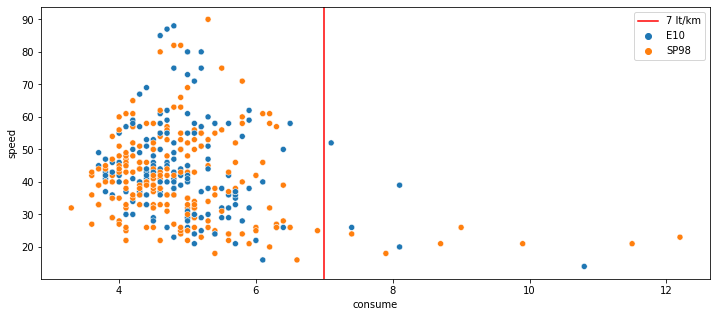

In [124]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot(data=consume_data, x="consume", y="speed", hue="gas_type", ax=ax)

ax.axvline(x=7, c="r", label="7 lt/km")
ax.legend()

#### I will work with short and medium distances (less than 50km). We have very few data from long trips and i want to check if statistics metrics keep the same from each fuel. Also, usually cars has a lot of short and medium distances trips and if we can find savings in that kind of trips will more impactful than long trips.

In [128]:
df_50 = consume_data[consume_data.distance < 50]

In [130]:
df_50.groupby("gas_type").consume.agg(["std", "mean", "median", "min", "max"])

,std,mean,median,min,max
gas_type,,,,,
E10,0.923795,4.964626,4.80,3.7,10.8
SP98,1.145652,4.904206,4.65,3.3,12.2


#### Against old statistics:

In [131]:
consume_data.groupby("gas_type").consume.agg(["std", "mean", "median", "min", "max"])

,std,mean,median,min,max
gas_type,,,,,
E10,0.897976,4.950955,4.8,3.7,10.8
SP98,1.133679,4.906849,4.7,3.3,12.2


#### It didn't change much.

### Let's remove outliers from consume:

In [125]:
df_7 = consume_data[consume_data.consume < 7]

#### Does mean and standard deviation change?

In [126]:
df_7.groupby("gas_type").consume.agg(["std", "mean", "median", "min", "max"])

,std,mean,median,min,max
gas_type,,,,,
E10,0.626602,4.840789,4.8,3.7,6.5
SP98,0.713330,4.754717,4.6,3.3,6.9


#### If we remove the consume outliers SP98 perform much better. We should think about getting more data and understand if those outlier are really outliers or just that SP98 has a much bigger standard deviation.